# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.

Primero Importaré la librería Pandas, para poder leer los DataFrames, posteriormente con ayuda del método info() verificaré que los tipos de datos correspondan al DataSet, y con el método head() dare un vistazo de los datos.

In [1]:
# importar librerías
import pandas as pd
from matplotlib import pyplot as plt 

import numpy as np


In [3]:
# leer conjuntos de datos en los DataFrames
df_orders = pd.read_csv('/datasets/instacart_orders.csv', sep=';')
df_products = pd.read_csv('/datasets/products.csv', sep=';')
df_aisles = pd.read_csv('/datasets/aisles.csv', sep=';')
df_departments = pd.read_csv('/datasets/departments.csv', sep=';' )
df_order_product = pd.read_csv('/datasets/order_products.csv', sep=';')


In [4]:
# mostrar información del DataFrame
print(df_orders.head())
df_orders.info()


   order_id  user_id  order_number  order_dow  order_hour_of_day  \
0   1515936   183418            11          6                 13   
1   1690866   163593             5          5                 12   
2   1454967    39980             4          5                 19   
3   1768857    82516            56          0                 20   
4   3007858   196724             2          4                 12   

   days_since_prior_order  
0                    30.0  
1                     9.0  
2                     2.0  
3                    10.0  
4                    17.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-nul

In [5]:
# mostrar información del DataFrame
print(df_products.head())
df_products.info()

   product_id                                       product_name  aisle_id  \
0           1                         Chocolate Sandwich Cookies        61   
1           2                                   All-Seasons Salt       104   
2           3               Robust Golden Unsweetened Oolong Tea        94   
3           4  Smart Ones Classic Favorites Mini Rigatoni Wit...        38   
4           5                          Green Chile Anytime Sauce         5   

   department_id  
0             19  
1             13  
2              7  
3              1  
4             13  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [6]:
# mostrar información del DataFrame
print(df_aisles.head())
df_aisles.info()

   aisle_id                       aisle
0         1       prepared soups salads
1         2           specialty cheeses
2         3         energy granola bars
3         4               instant foods
4         5  marinades meat preparation
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [7]:
# mostrar información del DataFrame
print(df_departments.head())
df_departments.info()

   department_id department
0              1     frozen
1              2      other
2              3     bakery
3              4    produce
4              5    alcohol
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [8]:
# mostrar información del DataFrame
print(df_order_product.head())
df_order_product.info(show_counts=True)

   order_id  product_id  add_to_cart_order  reordered
0   2141543       11440               17.0          0
1    567889        1560                1.0          1
2   2261212       26683                1.0          1
3    491251        8670               35.0          1
4   2571142        1940                5.0          1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 1. Descripción de los datos.

En el primer DF orders, contiene columnas que se podrían considerar como categóricas y tienen un tipo de datos INT cuando bien podria ser considerado un string, como en el caso de la columna , 'order_dow'. En el caso de 'days_since_prior_order' el tipo de datos es float, cuando podria ser considerado un int, y tambien en esta ultima hay una cantidad considerable de valores nulos. 


Y por ultimo en el DF 'df_order_product' el tipo de datos de la columna 'reordered' es del tipo int, cuando es categórica la variable.




# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Escribe aquí tu plan para el Paso 2. Preprocesamiento de los datos.

Para empezar verificare si existen valores duplicados en cada unos de los DataSets, en algunos se cuentan con tipos de datos object, por lo cual es relevante revisar si existen espacios extras, modificar las palabras a mayusculas o minusculas. Haré uso del método duplicated + sum para obtener aquellas filas duplicadas dentro del DF y asi mismo utilizaré el parametro subset= para corroborar cada una de las columnas. Al encontrar valores duplicados relevantes se puede implementar el metodo drop_duplicates con inplace=True para eliminarlos del DF, tambien se puede hacer filtros para una Series y descubrir si hay valores engañosos. Por último con ayuda del metodo value_counts se puede identificar aquellos valores duplicados en una columna incluso si son NaN.

Para los valores ausentes se implementara el método isna para encontrar valores ausentes en los DF, una vez que sean identificados se evaluará si es necesario eliminarlos o cambiarlos para no afectar el Data Set, además es posible que se requiera uso de filtros para ubicar en que columnas de los DataFrames tienen relacion con otras. Esto ayudara a definir su situación. En caso de requerir hacer modificaciones en los datos ausentes se puede considerar el uso de fillna o replace.  

Por Último para el cambio en tipo de datos con el método astype se puede lograr el cambio.

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `instacart_orders` data frame

In [9]:
# Revisa si hay pedidos duplicados
print(df_orders.duplicated().sum())


15


¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?

In [10]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
df_orders[df_orders.duplicated(subset=['order_id', 'order_hour_of_day'])]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
145574,794638,50898,24,3,2,2.0
223105,2160484,107525,16,3,2,30.0
230807,1918001,188546,14,3,2,16.0
266232,1782114,106752,1,3,2,NaN
273805,1112182,202304,84,3,2,6.0
284038,2845099,31189,11,3,2,7.0
311713,1021560,53767,3,3,2,9.0
321100,408114,68324,4,3,2,18.0
323900,1919531,191501,32,3,2,7.0
345917,2232988,82565,1,3,2,NaN


¿Qué sugiere este resultado? Se comprueba que los valores en las columnas order_dow y order_hour_of_day tienen valores duplicados

In [11]:
# Elimina los pedidos duplicados
print(df_orders.drop_duplicates(inplace=True))

None


In [12]:
# Vuelve a verificar si hay filas duplicadas
print(df_orders.duplicated().sum())

0


In [13]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos
print(df_orders['order_id'].value_counts())

1048576    1
3389216    1
1100604    1
1275704    1
2337103    1
          ..
1752059    1
2794488    1
711671     1
1711087    1
2047       1
Name: order_id, Length: 478952, dtype: int64


Describe brevemente tus hallazgos y lo que hiciste con ellos.

En el DF df_orders existian 15 valores duplicados, con ayuda del método duplicated + sum logre visualizar cuantos valores existían, después aplicando un filtro con el método duplicated visualice los 15 valores los cuales coincidian en el con pedidos hechos el miércoles a las 2 am. posteriormente con el método drop.duplicates y aplicando el inplace=True, elimine estos valores. Por último aplique un filtro en la columna 'order_id' con el método value_counts() para confirmar que han sido eliminados del DF.   

### `products` data frame

In [14]:
# Verifica si hay filas totalmente duplicadas
print(df_products[df_products.duplicated()])


Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []


In [15]:
# Revisa únicamente si hay ID de departamentos duplicados
df_products['department_id'].duplicated().sum()

49673

In [16]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
name_product_upper = df_products['product_name'].str.upper()
print(name_product_upper.duplicated().sum())

1361


In [17]:
# Revisa si hay nombres duplicados de productos no faltantes
df_products[~df_products['product_name'].isna() & (df_products['product_name'].str.upper().duplicated())]

,product_id,product_name,aisle_id,department_id
2058,2059,Biotin 1000 Mcg,47,11
5455,5456,Green Tea With Ginseng and Honey,96,20
5558,5559,Cream Of Mushroom Soup,69,15
7558,7559,Cinnamon Rolls with Icing,105,13
9037,9038,American Cheese slices,21,16
...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14
49692,49693,SPRING WATER BODY WASH,127,11


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Primeramente aplique el metodo duplicated para revisar si en el DF existian valores duplicados, pero arrojo 0. Después revise en la columna 'department_id' y encontre una gran cantidad de valores duplicados, esto se debe a que son pocos los departamentos donde se acomodan los productos. Posteriormente en la columna 'product_name' se hallaron 1361 valores duplicados, de los cuales 1258 son valores NaN, esto con la ayuda del método value_counts(dropna=False) el cual incluye los valores unicos y los None de una Series. 

### `departments` data frame

In [18]:
# Revisa si hay filas totalmente duplicadas
print(df_departments[df_departments.duplicated()])

Empty DataFrame
Columns: [department_id, department]
Index: []


In [19]:
# Revisa únicamente si hay IDs duplicadas de productos
print(df_departments['department_id'].duplicated().sum())

0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

No se encontraron valores duplicados en este DF

### `aisles` data frame

In [20]:
# Revisa si hay filas totalmente duplicadas
print(df_aisles.duplicated().sum())

0


In [21]:
# Revisa únicamente si hay IDs duplicadas de productos
print(df_aisles['aisle_id'].duplicated().sum())

0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

No se encontraron valores duplicados en este DF

### `order_products` data frame

In [22]:
# Revisa si hay filas totalmente duplicadas
print(df_order_product.duplicated().sum())

0


In [23]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
print(df_order_product.duplicated(subset=['order_id', 'product_id', 'add_to_cart_order', 'reordered']).sum())

0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Aplique el método duplicated para verificar que no existieran valores duplicados, esto arrojo 0 valores, posteriormente aplique el metodo duplicated con el parametro subset para verificar cada una de las columnas y descubir algun valor engañoso, pero como al contar con valores de tipo int y float, no hay la posibilidad que tengan espacios extras, o que algunos esten en mayusculas. 

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [24]:
# Encuentra los valores ausentes en la columna 'product_name'
values_ausen_product = df_products['product_name'].value_counts(dropna=False)
print(values_ausen_product)

NaN                                         1258
Halloween Mix Bag                              1
Pocket Pepperoni Pizza Style                   1
Pure Pomegranate Juice                         1
Raw Pistachios                                 1
                                            ... 
Recycled Adult Ultra Soft Toothbrush           1
Cheddar Snack Mix                              1
Fresh Ciliegine Mozzarella Cheese              1
Powdered Sugar                                 1
Crispy Battered Fish Portions Value Pack       1
Name: product_name, Length: 48437, dtype: int64


Describe brevemente cuáles son tus hallazgos.
En la columna 'product_name' se encuentran 1258 valores ausentes

In [25]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
productos_ausentes = df_products[df_products['product_name'].isna()]
print(productos_ausentes)

productos_en_pasillo_100 = (productos_ausentes['aisle_id'] == 100).all()
print(productos_en_pasillo_100)


       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]
True


Describe brevemente cuáles son tus hallazgos. Al usar el método isna en la columna'product_name' se puede observar que hay muchos valores ausentes relacionados con el aisle_id 100 pero para confirmarlo se hace una condicion en la columna aisle y el valor que nos arroja es True, por lo cual se puede concluir que todos los valores ausentes estan relacionados con aisle_id 100

In [26]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
print(productos_ausentes)
product_depar_21 = (productos_ausentes['department_id'] == 21).all()
print(product_depar_21)

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]
True


Describe brevemente cuáles son tus hallazgos. Al nuevamamente el DF se observa que los productos ausentes estan relacionados con el department id 21 al aplicar una nueva condicion se puede confirmar que si estan relacionados.

In [27]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
filtro_tables = df_products[(df_products['aisle_id'] == 100) & (df_products['department_id'] == 21)]
filtro_valores_ausentes = filtro_tables[filtro_tables['product_name'].isna()]
valores_ausentes_totales = filtro_valores_ausentes[['product_name','aisle_id','department_id']]
print(valores_ausentes_totales)

      product_name  aisle_id  department_id
37             NaN       100             21
71             NaN       100             21
109            NaN       100             21
296            NaN       100             21
416            NaN       100             21
...            ...       ...            ...
49552          NaN       100             21
49574          NaN       100             21
49640          NaN       100             21
49663          NaN       100             21
49668          NaN       100             21

[1258 rows x 3 columns]


Describe brevemente cuáles son tus hallazgos. Aqui se muestra unicamente las columnas product_name, aisle_id y department_id y se observa la relacion que previamente ya se habia descrito.

In [28]:
# Completa los nombres de productos ausentes con 'Unknown'
df_products['product_name'] = df_products['product_name'].fillna('Unknow')
print(df_products.isna().sum())
comprobar = df_products[df_products['product_name'] =='Unknow']
print(comprobar)


product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64
       product_id product_name  aisle_id  department_id
37             38       Unknow       100             21
71             72       Unknow       100             21
109           110       Unknow       100             21
296           297       Unknow       100             21
416           417       Unknow       100             21
...           ...          ...       ...            ...
49552       49553       Unknow       100             21
49574       49575       Unknow       100             21
49640       49641       Unknow       100             21
49663       49664       Unknow       100             21
49668       49669       Unknow       100             21

[1258 rows x 4 columns]


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Se encontraron 1258 valores ausentes dentro de la columna product_name los cuales tienen una relación con las columnas aisle_id 100 y department_id 21, al ubicar estos valores ausentes se decidio rellenarlos con el metodo fillna y como nuevo valor se le asigno "Unknow", al final se hizo una comprobacion para corroborrar que los datos habian sido modificados.

### `orders` data frame

In [29]:
# Encuentra los valores ausentes
print(df_orders.isna().sum())

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64


In [30]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
print(df_orders['days_since_prior_order'].value_counts(dropna=False).sort_index())

0.0      9589
1.0     20179
2.0     27138
3.0     30224
4.0     31006
5.0     30096
6.0     33930
7.0     44577
8.0     25361
9.0     16753
10.0    13309
11.0    11467
12.0    10658
13.0    11737
14.0    13992
15.0     9416
16.0     6587
17.0     5498
18.0     4971
19.0     4939
20.0     5302
21.0     6448
22.0     4514
23.0     3337
24.0     3015
25.0     2711
26.0     2640
27.0     2986
28.0     3745
29.0     2673
30.0    51337
NaN     28817
Name: days_since_prior_order, dtype: int64


Describe brevemente tus hallazgos y lo que hiciste con ellos. Se encontraron valores ausentes en la columna days_since, pero al verificarla utilizando el método value_counts(dropna=False) con el parametro dropna en false para incluir los valores ausentes, y por ultimo utilizando el método sort_index para ordernarlos vemos que el primer valor no es ausente. 

### `order_products` data frame

In [31]:
# Encuentra los valores ausentes
print(df_order_product.isna().sum())

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64


In [32]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
valores_max_min = (df_order_product['add_to_cart_order'].min(), df_order_product['add_to_cart_order'].max()) 
print(valores_max_min)


(1.0, 64.0)


Describe brevemente cuáles son tus hallazgos.
Hay 836 valores ausentes en la columna add_to_cart_order. El valor minimo de esta columna es 1.0 y el maximo es 64.0

In [33]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
filtro_ausente_cart = df_order_product[df_order_product['add_to_cart_order'].isna()]
extraer_order_id = filtro_ausente_cart['order_id'].unique()
print(extraer_order_id)

[2449164 1968313 2926893 1717990 1959075  844733   61355  936852  264710
 1564093  129627  293169 2849370 1386261 3308010  903110 2136777 3347453
 1888628  165801 2094761 1038146 2997021  813364 2256933  171934 2409109
 1730767 1169835  733526  404157 3125735  747668 1800005 1961723  871281
  388234 1648217 1477139  102236 1021563 1832957 2721963  678116 1220886
 1673227 2999801 1633337 2470674 2625444 1677118 2479011 3383594 1183255
 1713430 2652650 1598369 1916118  854647 1302315  888470  180546 2621907
 1308785 2729254    9310 2170451 2979697 1625713 1529171]


In [34]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
df_order_product.groupby('order_id')['product_id'].count().sort_values(ascending=False)

# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
# filtrar con el metodo isin para identificar ids faltantes

df_order_product[df_order_product['order_id'].isin(extraer_order_id)].groupby('order_id')['product_id'].count().sort_values(ascending=False)


order_id
61355      127
3308010    115
2136777    108
171934     104
1959075     98
          ... 
888470      65
1598369     65
747668      65
1677118     65
9310        65
Name: product_id, Length: 70, dtype: int64

Describe brevemente cuáles son tus hallazgos.
Con base en los resultados existen order_id con mas de 64 productos, por lo cual se cumple se puede deducir que los valores ausentes si tienen mas de 64 productos

In [35]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
df_order_product['add_to_cart_order'] = df_order_product['add_to_cart_order'].fillna(999)
df_order_product['add_to_cart_order'] = df_order_product['add_to_cart_order'].astype('int')
comprobar_1 = df_order_product[df_order_product['add_to_cart_order'] == 999]
print(comprobar_1)
df_order_product.info()

         order_id  product_id  add_to_cart_order  reordered
737       2449164        5068                999          0
9926      1968313       43867                999          0
14394     2926893       11688                999          0
16418     1717990        4142                999          0
30114     1959075       42828                999          1
...           ...         ...                ...        ...
4505662   1800005        7411                999          0
4511400   1633337         260                999          0
4517562    404157        9517                999          0
4534112   1673227       17835                999          0
4535739   1832957       17949                999          1

[836 rows x 4 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  

Describe brevemente tus hallazgos y lo que hiciste con ellos.
Se reemplazaron los valores ausentes con 999 con ayuda del método fillna y para cambiar el tipo de datos de la columna "add_to_cart_order" se uso el metodo astype, por ultimo corroborre los cambios creando una variable llamada comprobar_1 y llame a info para verificar la columna se modifico a int.

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos

Dentro de los conjuntos de datos existian algunas columnas que contenian muchos valores duplicados y ausentes, por lo cual fue necesario implementar algunos cambios en los DF para un mejor manejo de la data. asimismo hay algunos que se conservaron ya que si se eliminaban era posible afectar de manera significativa, por lo cual se opto por reemplazar esos valores. 


# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [36]:
# verificación de la columna order_hour_of_day
valores_hora = df_orders['order_hour_of_day'].value_counts().sort_index()
print(valores_hora)

0      3180
1      1763
2       989
3       770
4       765
5      1371
6      4215
7     13043
8     25024
9     35896
10    40578
11    40032
12    38034
13    39007
14    39631
15    39789
16    38112
17    31930
18    25510
19    19547
20    14624
21    11019
22     8512
23     5611
Name: order_hour_of_day, dtype: int64


In [37]:
# verificar los datos de la columna order_dow
datos_semana = df_orders['order_dow'].value_counts().sort_index()
print(datos_semana)

0    84090
1    82185
2    65833
3    60897
4    59810
5    63488
6    62649
Name: order_dow, dtype: int64


Escribe aquí tus conclusiones. al verificar los valores unicos dentro de las columnas order_hour_of_day y order_dow se puede observar que cuentan con datos razonables, por lo cual no es necesario realizar cambios. 

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

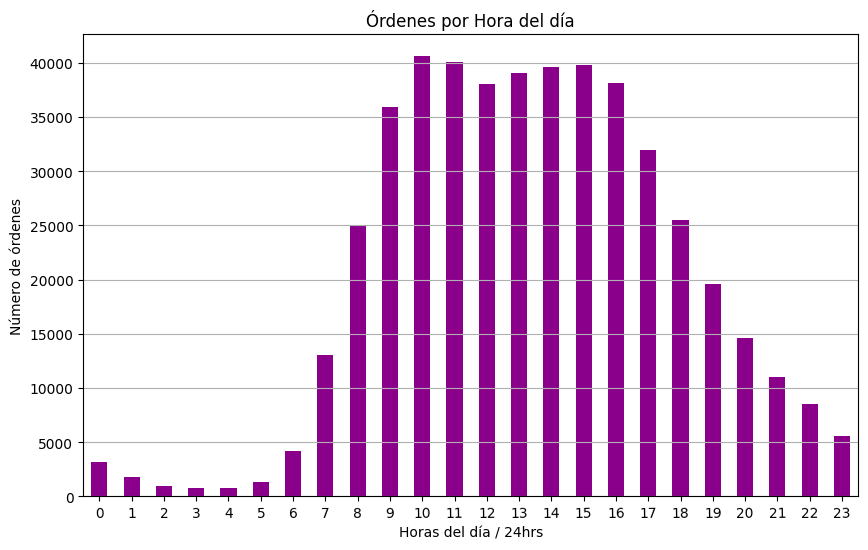

In [38]:
# filtro para agrupar órdenes hechas por hora del día 
pedidos_por_hora = df_orders.groupby('order_hour_of_day')['order_id'].count()

# gráfica de órdenes por hora del día  
pedidos_por_hora.plot(kind='bar', 
                      figsize=(10, 6), 
                      title='Órdenes por Hora del día',
                      xlabel=('Horas del día / 24hrs'), 
                      ylabel=('Número de órdenes'),
                      rot=1,
                     color='darkmagenta')
plt.grid(axis='y')
plt.show()


Escribe aquí tus conclusiones. De acuerdo al gráfico las horas en las que se presentan más números de órdenes es de las 9 am hasta las 16 pm.  

### [A3] ¿Qué día de la semana compran víveres las personas?

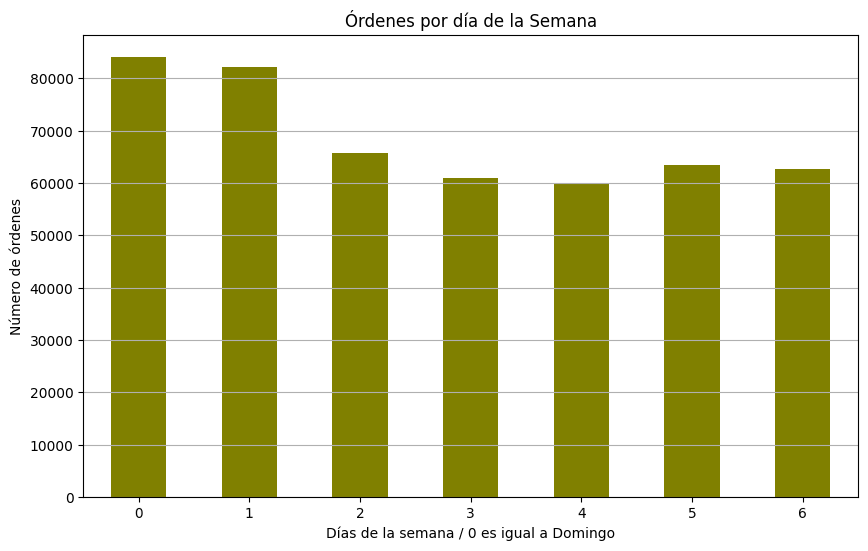

In [39]:
# Filtro para agrupar los pedidos realizados por día de la semana 
compras_por_semana = df_orders.groupby('order_dow')['order_id'].count()

# Gráfica de órdenes realizadas por dia de la semana
compras_por_semana.plot(title='Órdenes por día de la Semana',
                        xlabel='Días de la semana / 0 es igual a Domingo',
                        ylabel='Número de órdenes',
                        kind='bar',
                        figsize=(10,6),
                        color='olive',
                       rot = 1)
plt.grid(axis='y')
plt.show()


Escribe aquí tus conclusiones. 
La gráfica muestra que los días en los que se realizan mayores ordenes son los Domingos(0) y Lunes (1), mientras los dias que disminuyen las órdenes son los Jueves (4)

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

Valor minimo de dias transcurridos : 0.0
Valor maximo de dias transcurridos : 30.0


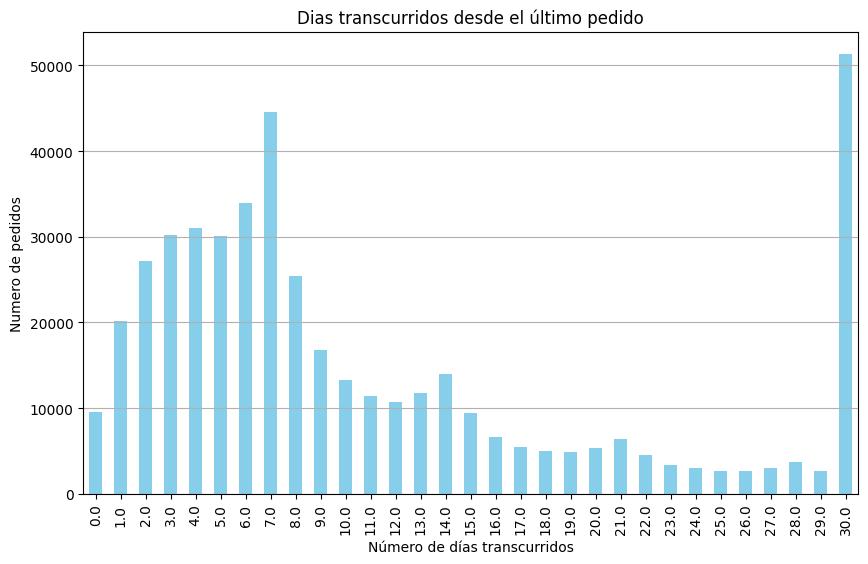

In [40]:
#Filtro para agrupar los dias desde que el cliente hizo un pedido 
tiempo_espera = df_orders['days_since_prior_order'].value_counts().sort_index()

# valores minimos y maximos
print(f"Valor minimo de dias transcurridos : {df_orders['days_since_prior_order'].min()}")
print(f"Valor maximo de dias transcurridos : {df_orders['days_since_prior_order'].max()}")

# Gráfica de los días que han transcurrido desde el último pedido del cliente
tiempo_espera.plot(title='Dias transcurridos desde el último pedido',
                   xlabel='Número de días transcurridos',
                   ylabel='Numero de pedidos',
                   kind='bar',
                   figsize=(10,6),
                   color='skyblue')
plt.grid(axis='y')
plt.show()

Escribe aquí tus conclusiones. En la grafica se observa que los dias minimos que transcurren para que el cliente pida otra orden es de 0 dias y un maximo de 30 dias, de los cuales los más frecuentes que transcurren para que el cliente ordene nuevamente son 7 dias y 30 dias.  

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

In [41]:
# filtro para los miercoles
miercoles= df_orders['order_dow'] == 3
ordenes_miercoles = df_orders[miercoles]['order_hour_of_day'].value_counts().sort_index()


In [42]:
# filtro para los sabados
sabado = df_orders['order_dow'] == 6
ordenes_sabados = df_orders[sabado]['order_hour_of_day'].value_counts().sort_index()

In [43]:
# Uso de Concatenar para fusionar los filtros miercoles y sabado 
order_miercoles_sabado = pd.concat([ordenes_miercoles, ordenes_sabados], axis=1)
order_miercoles_sabado.columns = ['Miércoles', "Sábados"]
order_miercoles_sabado

,Miércoles,Sábados
0,373,464
1,215,254
2,106,177
3,101,125
4,108,118
5,170,161
6,643,451
7,1732,1619
8,3125,3246
9,4490,4311


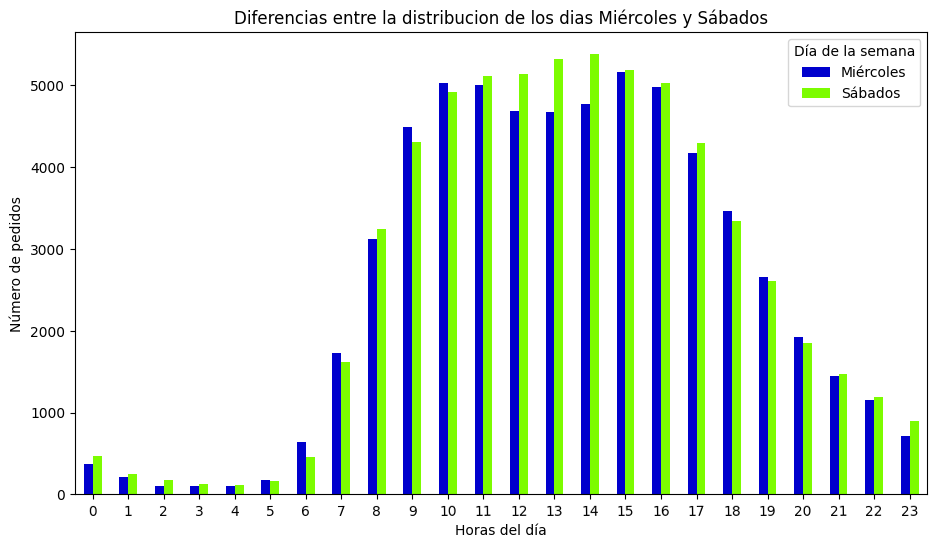

In [44]:
order_miercoles_sabado.plot(kind='bar',
                 title='Diferencias entre la distribucion de los dias Miércoles y Sábados',
                 xlabel='Horas del día',
                 ylabel='Número de pedidos',
                  figsize=(11,6),
                 color=['mediumblue', 'lawngreen'],
                 rot=1)
plt.legend(title='Día de la semana')
plt.show()

Escribe aquí tus conclusiones. En el gráfico se puede observar que si existe una diferencia entre los dos dias, ya que el sábado tiene un mejor numero de pedidos en casi todas las horas del día, aunque se podria considerar que esta diferencia no es tan significativa, ya que los miércoles tienen un considerable número de pedidos.

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

In [45]:
# agrupar los pedidos realizados por los clientes
filtro_pedidos_user = df_orders.groupby('user_id').size()
#cuantos clientes hicieron 1, 2, 3 ... pedidos
num_pedidos = filtro_pedidos_user.value_counts().sort_index()

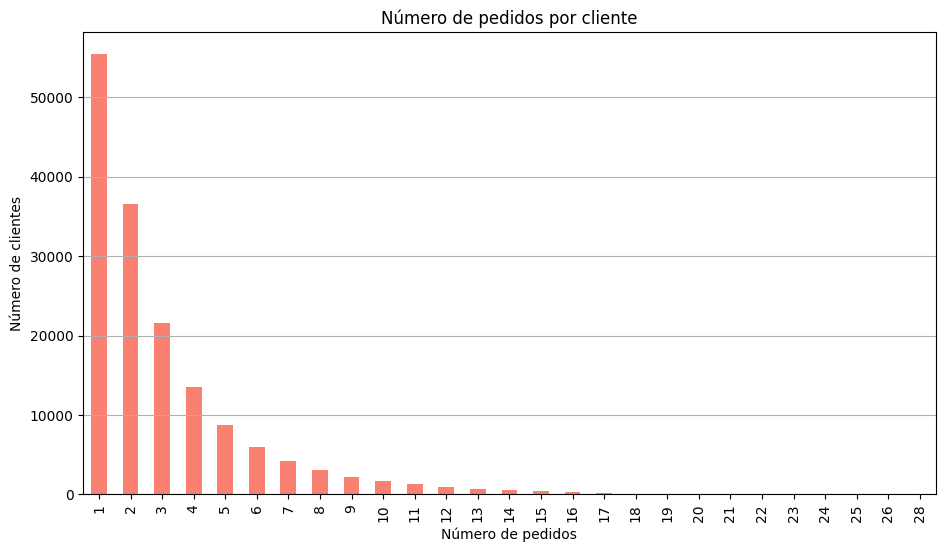

In [46]:
num_pedidos.plot(title='Número de pedidos por cliente',
                         kind='bar',
                         xlabel='Número de pedidos',
                         ylabel='Número de clientes',
                         color='salmon',
                         figsize=(11,6))
plt.grid(axis='y')
plt.show()

Escribe aquí tus conclusiones. Se puede observar en el grafico que el numero de pedido mas frecuente es de 1, mientras que el menos frecuente es de 16 pedidos hechos por un cliente.

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [47]:
# hacer un merge entre orders y products
df_prueba = pd.merge(df_order_product, df_products, on ='product_id')

In [48]:
# agrupar los productos por product_id y name, crear una nueva columna llamada 'counts'
productos_vendidos = df_prueba.groupby(['product_id', 'product_name']).size().reset_index(name='counts')

In [49]:
productos_ordenados = productos_vendidos.sort_values(by='counts', ascending=False)

In [68]:
# obtener los 20 productos top
filtro_top20 = productos_ordenados.head(20)
# imprimir
print(filtro_top20)

       product_id              product_name  counts
22808       24852                    Banana   66050
12025       13176    Bag of Organic Bananas   53297
19370       21137      Organic Strawberries   37039
20077       21903      Organic Baby Spinach   33971
43271       47209      Organic Hass Avocado   29773
43788       47766           Organic Avocado   24689
43663       47626               Large Lemon   21495
15364       16797              Strawberries   20018
24047       26209                     Limes   19690
25556       27845        Organic Whole Milk   19600
25666       27966       Organic Raspberries   19197
21025       22935      Organic Yellow Onion   15898
22908       24964            Organic Garlic   15292
41244       45007          Organic Zucchini   14584
35996       39275       Organic Blueberries   13879
45561       49683            Cucumber Kirby   13675
25889       28204        Organic Fuji Apple   12544
5375         5876             Organic Lemon   12232
7543        

Escribe aquí tus conclusiones. Se muestra una lista de los 20 productos mas vendidos incluyendo el Id, nombre y cantidad vendia de dichos productos.

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [51]:
# agrupar las order_id por el product_id y contarlos
total_producto_ordenes = df_order_product.groupby('order_id')['product_id'].count()

In [52]:
# Crear una variable para despues graficar
histo_valores = total_producto_ordenes.value_counts().sort_index()

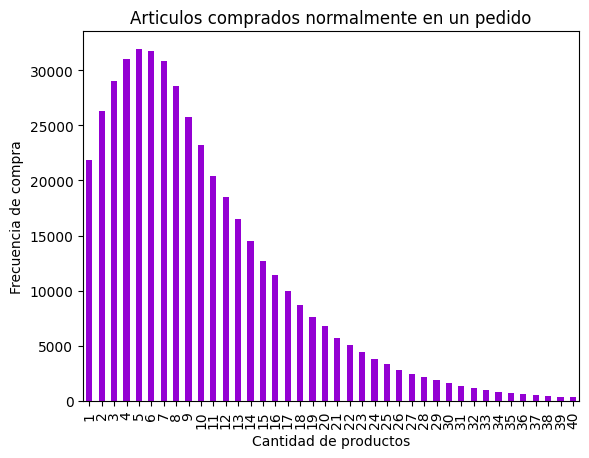

In [53]:
# graficar los resultados
histo_valores[histo_valores.index < 41].plot(kind= 'bar',
                   title='Articulos comprados normalmente en un pedido',
                   xlabel='Cantidad de productos',
                   ylabel='Frecuencia de compra', 
                    color='darkviolet')

plt.show()

Escribe aquí tus conclusiones. La cantidad de articulos comprados en un pedido son en su mayoria de 1 a 10 articulos entre los mas frecuente. 

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [54]:
# unir DF product y order_product
df_combinados = pd.merge(df_order_product, df_products, on='product_id')

In [55]:
# agrupar por product_id y nombre del producto
articulos_recomprados = df_combinados.groupby(['product_id','product_name'])['reordered'].sum().reset_index()

In [56]:
# filtrar los articulos que han sido comprados mas de 1 vez y ordenarlos 
articulos_recomprados = articulos_recomprados[articulos_recomprados['reordered'] > 1].sort_values(by='reordered', ascending=False)

In [57]:
## imprimir articulos con mayor frecuencia
top20_articulos_recomprados = articulos_recomprados.head(20)
print(top20_articulos_recomprados)

       product_id              product_name  reordered
22808       24852                    Banana      55763
12025       13176    Bag of Organic Bananas      44450
19370       21137      Organic Strawberries      28639
20077       21903      Organic Baby Spinach      26233
43271       47209      Organic Hass Avocado      23629
43788       47766           Organic Avocado      18743
25556       27845        Organic Whole Milk      16251
43663       47626               Large Lemon      15044
25666       27966       Organic Raspberries      14748
15364       16797              Strawberries      13945
24047       26209                     Limes      13327
21025       22935      Organic Yellow Onion      11145
22908       24964            Organic Garlic      10411
41244       45007          Organic Zucchini      10076
45561       49683            Cucumber Kirby       9538
25889       28204        Organic Fuji Apple       8989
7543         8277  Apple Honeycrisp Organic       8836
35996     

Escribe aquí tus conclusiones. Los articulos top 20 han sido recomprados entre 8000 y 55763 veces. Tambien se observa que la mayoria son productos naturales.

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [58]:
# Agrupar por producto
df_productos_agru = df_combinados.groupby(['product_id' , 'product_name'])

In [59]:
# calcular la proporcion de productos 
reorder_proporcion = df_productos_agru["reordered"].mean()
# convertir a DF y ordenar
reorder_df = reorder_proporcion.to_frame(name="reorder_proporcion").reset_index()
reorder_df.sort_values(by="reorder_proporcion", ascending=False, inplace=True)

In [60]:
# imprimir resultados
print("Proporcion de veces que se piden los productos")
print()
print(reorder_df.head(20))

Proporcion de veces que se piden los productos

       product_id                                       product_name  \
13453       14721                            Bone Strength Take Care   
19195       20949                           Vanilla Sandwich Cookies   
6136         6723                                   Palmiers- Petite   
6144         6732                  Naturally Sparkling Mineral Water   
41319       45088  California Dill Pollen & Garlic Goat Cheese & ...   
41310       45078                                       Pomegranatea   
19258       21016       Parchment Lined 8 in x 3.75 in x 2.5 in Pans   
19248       21005                        Peanut Butter Pie Ice Cream   
32273       35192                         Chocolate Soy Milk Singles   
32277       35197  Mocha Chocolate Chip  Organic Non-Dairy Frozen...   
6211         6810                        Raspberry Goji Paleo Prints   
41274       45040                                 Head Lock Mega Gel   
41269       4503

Escribe aquí tus conclusiones. En los resultados se muestra que cada producto se ha reordenado 1 vez.

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [61]:
# valores unicos de reordered
df_order_product['reordered'].unique()

array([0, 1])

In [62]:
# crear un merge con df_order y df_order_product
df_merge = pd.merge(df_orders, df_order_product, on='order_id')

In [63]:
# agrupar por user_id y reordered para verificar sus pedidos y aplicar el mean()
pedido_cliente = df_merge.groupby('user_id')['reordered'].mean()

# crear variable donde se obtendra la proporcion de las veces que ha vuelto a pedir un producto
proporcion_pedido_ordenado = pedido_cliente.sort_values(ascending=False)

In [64]:
# imprimir resultado
print(proporcion_pedido_ordenado.head(10))

user_id
137587    1.0
173474    1.0
13918     1.0
62300     1.0
62307     1.0
96301     1.0
62312     1.0
48616     1.0
62316     1.0
191162    1.0
Name: reordered, dtype: float64


Escribe aquí tus conclusiones

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [65]:
# filtro de la columna add_to y condicion a 1 
primeros_20 = df_combinados[df_combinados['add_to_cart_order'] == 1]

In [66]:
# Se agrupa por las columnas id y name, se hace el conteo por la columna product_id y se ordenan de manera descendente
contar_productos = primeros_20.groupby(['product_id', 'product_name'])['product_id'].count().sort_values(ascending=False)

In [67]:
# agregar la columna count con el metodo reset_index(name=)
contar_productos_index = contar_productos.reset_index(name='count')
# imprimir resultados
print(contar_productos_index.head(20))

    product_id                 product_name  count
0        24852                       Banana  15562
1        13176       Bag of Organic Bananas  11026
2        27845           Organic Whole Milk   4363
3        21137         Organic Strawberries   3946
4        47209         Organic Hass Avocado   3390
5        21903         Organic Baby Spinach   3336
6        47766              Organic Avocado   3044
7        19660                 Spring Water   2336
8        16797                 Strawberries   2308
9        27966          Organic Raspberries   2024
10       44632   Sparkling Water Grapefruit   1914
11       49235          Organic Half & Half   1797
12       47626                  Large Lemon   1737
13         196                         Soda   1733
14       38689     Organic Reduced Fat Milk   1397
15       26209                        Limes   1370
16       12341                Hass Avocados   1340
17        5785  Organic Reduced Fat 2% Milk   1310
18       27086                 

Escribe aquí tus conclusiones. Los primeros 20 productos que los clientes agregan comienzan por Bananas, esto lo hacen 15562 personas y las Raspberries son el último producto dentro del top 20 que las personas agregan, dando un total de 1246 clientes. 

### Conclusion general del proyecto:

Los DF contaban con valores duplicados, de los cuales algunos no contenian la información necesaria, puede ser por que haya sido omitida o habra ocurrido algun error en la captura. Por otra parte tambien se encontraron valores ausentes, esto arrojo un total de 70 ordenes que superaban el 'maximo' de productos en los pedidos de los clientes, dichos valores fueron relleandos con 999. En cuanto a la visualizacion de datos se logro observar que entre las 9 y las 16 horas se alcanza el punto maximo de pedidos, por otra parte se hizo un analisis para comparar las ventas de los dias miercoles y sabados, lo que arrojo una mayor solicitud de ventas los dias sabados, casi en los mismos horarios. Por otra parte el numero de pedidos por cliente oscila entre 1 y 4 pedidos, y la proporcion de productos comprados por cliente va de 1 hasta 10 productos. En cuanto a el primer producto que los clientes agregan a su carrito se logro observar que son las Bananas, siendo estas las mas populares. 

<div class="alert alert-block alert-warning">
<b>Comentario revisor</b> <a class="tocSkip"></a>

En general creo que hiciste un muy buen trabajo con el proyecto, pudiste limpiar y trabajar las bases de datos de beuna manera, análisis de duplicados, y de valores faltantes. Además dearrollaste de buena manera los diferentes anális que se solicitaban y cuando podías los complementabas con greaficas. No obstante, recuerda que siempre podemos mejorar y te menciono algunos puntos que debes considerar:

* Revisar que los filtros sean correctos en algunos apartados con base en la indicación
    
    
*  Realizar análisis complementarios eliminando los valores que parecen ser atípicos. 
    
*  Realizar gráficas de barras en algunos análisis para complementarlos.
    
*  Ordenar los datos para que sean más claros los resultados.
    
*  Profundizar en los resultados intermedios y en la conclusión final.

</div>